In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [219]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(datasets.MNIST('data_', train=True, download=True, transform=transforms.
                                           Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])),
                           batch_size=batch_size, shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(datasets.MNIST('data_', train=False, download=True, transform=transforms.
                                                         Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])),
                                          batch_size=batch_size, shuffle=True, num_workers=2)

In [220]:
count = 0
for (x_train, y_train) in train_loader:
    count += 1
print(count, x_train.size(), y_train.size(), x_train.type, y_train.type_as)

1875 torch.Size([32, 1, 28, 28]) torch.Size([32]) <built-in method type of Tensor object at 0x0000020BA2BADD38> <built-in method type_as of Tensor object at 0x0000020BA31DAFC0>


In [221]:
input_dim = 28*28

In [222]:
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 10)
    
    def forward(self, x, input_dim):
        x = x.view(-1, input_dim)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(self.fc3(x))

In [223]:
model = Net(input_dim)
print(model.type)

<bound method Module.type of Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)>


In [224]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [225]:
def train(epoch, log_interval=100):
    model.train()
    
    train_loss, correct = 0, 0
    loss_per_epoch = []
    Accuracy_per_epoch = []
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data, input_dim)
        
        prediction = output.data.max(1)[1]
        train_loss += F.nll_loss(output, target).data[0]
        #correct += prediction.eq(target.data).sum()
        
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        #if batch_idx % log_interval == 0:
            #print('Train Epoch:{}, Train Loss: {:.6f}'.format(epoch, loss.data[0]))
            
    Average_loss = train_loss/len(test_loader)
    loss_per_epoch.append(Average_loss)
    #Accuracy = 100. * correct/len(test_loader.dataset)
    #Accuracy_per_epoch.append(Accuracy)
    return loss_per_epoch

In [226]:
def test():
    model.eval()
    
    test_not_using_loss, correct = 0, 0
    Accuracy_per_epoch = []
    
    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        output = model(data, input_dim)
        prediction = output.data.max(1)[1]
        correct += prediction.eq(target.data).sum()
  
    Accuracy = 100. * correct/len(test_loader.dataset)
    Accuracy_per_epoch.append(Accuracy)
  
    return Accuracy_per_epoch

C:\Users\aprat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':
C:\Users\aprat\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


Accuracies per epoch:  [[tensor(93)], [tensor(95)], [tensor(96)], [tensor(96)], [tensor(96)]]


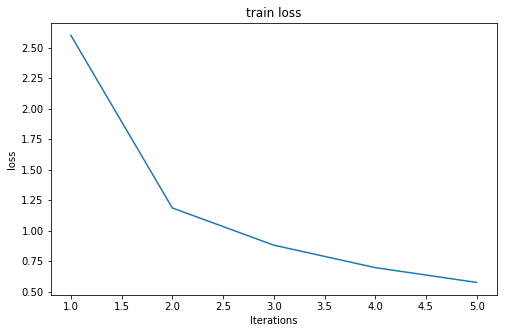

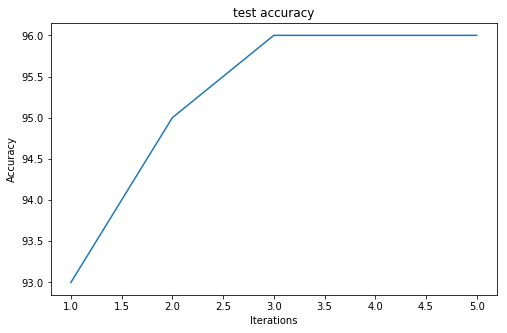

In [227]:
epochs = 5
lossv = []
accv = []

for epoch in range(1, epochs+1):
    l = train(epoch)
    a = test()
    lossv.append(l)
    accv.append(a)

plt.figure(figsize=(8,5))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('train loss')
plt.xlabel('Iterations')
plt.ylabel('loss')

plt.figure(figsize=(8,5))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
print('Accuracies per epoch: ', accv)

In [228]:
data = np.load('ORL_faces.npz')
trainX= data['trainX']
trainY = data['trainY']
testX = data['testX']
testY = data['testY']

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(240, 10304) (240,) (160, 10304) (160,)


In [229]:
trainX = torch.from_numpy(trainX)
trainY = torch.from_numpy(trainY)
testX = torch.from_numpy(testX)
testY = torch.from_numpy(testY)

In [230]:
train_data = torch.utils.data.TensorDataset(trainX, trainY)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [231]:
input_dim = 10304
model = Net(input_dim)

In [232]:
epoch = 3
for epoch in range(1, epochs+1):
    l = train(epoch)
    print(l)

RuntimeError: Expected object of type torch.FloatTensor but found type torch.DoubleTensor for argument #4 'mat1'